# Laboration 1 i Maskininlärning:

## **Disease Prediction**

### Introduktion & Problemställning ###

I denna laboration var syftet att förutsäga förekomsten av hjärt- kärlsjukdom (engelska: *Cardio Vascular Disease eller CVD*), baserat på data från en studie med 70 000 patienter. Datasetet innehåller 13 kategorier av demografisk, klinisk och biometrisk karaktär. Den beroende kategorin: *cardio*, representerar om en patient lider av hjärt-kärlsjukdom (1) eller inte (0).
  
Utmaningen i denna laboration låg i att utforska och analysera datan, samt skapa nya kategorier och visualisera dessa, Därefter tränades, testades och utvärderades flera olika maskininlärningsmodeller med målet att hitta en stabil och tillförlitlig modell för att förutspå hjärt-kärlsjukdom. 

### Relevanta teoretisk modeller som använts är: ###

#### Medicinska observationer såsom BMI och Blodtryck: ####

**BMI:** Ett mått på kroppsvikt i relation till längd, beräknat som: 
$$
\text{BMI} = \frac{\text{Vikt (kg)}}{(\text{Längd (cm)}/100)^2}
$$

BMI klassificeras enligt medicinska riktlinjer:

- Normal Range: 18.5 – 24.9

- Overweight: 25.0 – 29.9

- Obese (Class I): 30.0 – 34.9

- Obese (Class II): 35.0 – 39.9

- Obese (Class III): 40.0 och uppåt

källa https://en.wikipedia.org/wiki/Body_mass_index

**Blodtryck:** Klassificeras enligt medicinska riktlinjer för:

- Normal: Systoliskt < 120 mmHg och Diastoliskt < 80 mmHg

- Elevated: Systoliskt 120–129 mmHg och Diastoliskt < 80 mmHg

- Hypertension Stage 1: Systoliskt 130–139 mmHg eller Diastoliskt 80–89 mmHg

- Hypertension Stage 2: Systoliskt ≥ 140 mmHg eller Diastoliskt ≥ 90 mmHg

- Hypertensive Crisis: Systoliskt > 180 mmHg och/eller Diastoliskt > 120 mmHg

källa: https://en.wikipedia.org/wiki/Blood_pressure

#### Modellernas generaliseringsförmåga: ####

**Bias:** Modellens systematiska fel, där hög bias leder till underanpassning av datan, dvs för enkla generaliseringar.

**Varians:** Hur känslig modellen är för förändringar i datan, där hög varians leder till överanpassning, dvs för snäv generalisering.

**Underfitting:** (*underanpassning*) Modellen lär sig inte tillräckligt, dvs låg träffsäkerhet på både tränings- och testdata.

**Overfitting:** (*överanpassning*) Modellen lär sig för mycket detaljer från träningen, dvs hög träffsäkerhet på träningsdata men låg på ny data.

**Bias–varians-tradeoff:** Avägningen mellan bias och varians för att kunna genrelaisera en modell så bra som möjligt.

**Regularisering:**
Är en teknik att minska överanpassning av en regressionsmodell genom att lägga till en straffterm till förlustfunktionen. Resultatet blir att variansen minskar men biasen ökar enligt bias_variance-trade-off. De strafftermer som annvänmdes i undersökningen var *Lasso (l1-norm)* och *Ridge (l2-norm)*:

- **L1-regularisering:** $\text{Penalty} = \lambda \sum_{i} |\beta_i|$ 

- **L2-regularisering:** $\text{Penalty} = \lambda \sum_{i} \beta_i^2$ 

**Korsvalidering:**
Korsvalidering (cross validation eller CV) innebär att datan delas upp i flera delar (folds) där varje del turas om att vara valideringsset. Det ger en mer stabil skattning av modellens prestanda och minskar risken för överanpassning.

**GridSearchCV:**
Används för att hitta bästa hyperparametrarna genom korsvalidering över ett parametergrid.

#### Regressionsmodeller: ####

Regression används för att predicera kontinuerliga utfall, till skillnad från klassificering. Exempelvis används linjär regression för att modellera sambandet mellan en beroende variabel och en eller flera oberoende variabler.

**Logistisk Regression:**
En statistisk modell för binär klassificering som estimerar sannolikheten att en observation tillhör en viss klass. Sannolikheten $P(y=1 \mid X)$ ges av:

$$ 
P(y=1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_p x_p)}}
$$

**Ensemblemodell (Voting Classifier)**
Ensemblemetoder kombinerar flera olika modeller för att förbättra den totala klassificeringen av målvariabeln. I denna studie användes en Voting Classifier, vilket är en metod som bygger på att flera modeller (t.ex. Decision Tree, SVM, Logistic Regression, Random Forest) "röstar" om vilken klassificering som ska ges. En ensemblemodell kan ofta ge bättre generalisering än enskilda modeller. Röstningen baseras på: antingen *Hard voting;* den klass som flest modeller förutspår väljs. Eller på *Soft voting:* Modellerna ger sannolikheter för varje klass; där den klass med högst genomsnittlig sannolikhet väljs.

**Bagging (Bootstrap Aggregating)**
Bagging är en ensembleteknik som tränar flera instanser av samma modell (vanligtvis beslutsträd) på olika slumpmässiga delmängder av träningsdatan. Resultaten kombineras (ofta via majoritetsröstning) för att minska varians och förbättra stabilitet. Random Forest är ett exempel på en modell som använder bagging.

#### Modellernas utvärderingsverktyg: ####

**One-hot encoding:**
Konverterar kategoriska variabler till binära dummyvariabler för att användas i maskininlärningsmodeller.

**Klassifiseringsrapport & förvrirrngsmatris (Confusion Matrix):** En tabell som visar antal *TP* (*True Positives*), *TN* (*True Negatives*), *FP* (*False Positives*) och *FN* (*False Negatives*) för en modell. Där:

- **Precision:** Andel positiva prediktioner som faktiskt är positiva  
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$

- **Recall (känslighet):** Andel verkligt positiva som modellen korrekt identifierar  
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$

- **F1-score:** Harmoniskt medel av precision och recall  
  $$
  \text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
  $$

- **Accuracy:** Andel korrekta förutsägelser totalt  
  $$
  \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
  $$







In [ ]:
# Ladd om moduler automatiskt som ändras under utveckling
# Kodhjälp ChatGPT, prompt: "hur kan jag ladda om funktioner som ändras löpande i en py-fil med klasser i som jag använder i jupyter notebok?"
%load_ext autoreload
%autoreload 2

In [ ]:
# Importera klasser och funktioner från cvd_models.py för presentation
from labb1.cvd_models import DataLoader, DataProcessor, DataVisualizer, DataPreparer, ModelTrainer, EnsembleModeler

In [155]:
# Ange sökvägen till din CSV-fil
data_path = "/Users/paraugustsson/Machine-learning-AI24-1/cardio_train.csv" # Anpassa sökvägen

# Skapa DataLoader-objektet och läs in datan
loader = DataLoader(data_path)
df = loader.load_data()

# Beskriv datan
print("Data description:")
df.describe()

Data description:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Analys av initial EDA (Exploratory Data Analysis): ###

Vid en första överblick identifierades kolumnen “ID” som ett unikt patientnummer utan analytiskt värde och togs därför bort. Kolumnen “age” som angavs i dagar omvandlades till år för att förenkla tolkning och visualisering. För att ytterligare underlätta analys skapades nya etikettkolumner för variabler som “gender”, “cholesterol”, “gluc”, “smoke” och “cardio”. Genom feature engineering konstruerades också kategorier för blodtryck och BMI för att hitta tydligare mönster i datan. Negativa eller orimliga värden i kolumnerna “ap_hi” (systoliskt blodtryck) och “ap_lo” (diastoliskt blodtryck) togs bort, eftersom sådana värden inte är medicinskt rimliga. Samma process tillämpades på BMI-värden som föll utanför det kliniskt relevanta intervallet.

In [156]:
# Skapa DataProcessor-objektet för att bearbeta datan
processor = DataProcessor(df)

# Kör den initiala rensningen
df_clean = processor.initial_data_process()

# Utför feature engineering för BMI och blodtryck
df_clean = processor.feature_engineering_bmi()
df_clean = processor.feature_engineering_bp()

# Visa den rensade datan
#print("Data after initial processing:")
#df_clean.head()
#df_clean.columns
#df_clean.shape
#df_clean.describe()


/Users/paraugustsson/Machine-learning-AI24-1/cvd_models.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="CVD", data=self.df, palette="Set2", ax=ax[0, 0])


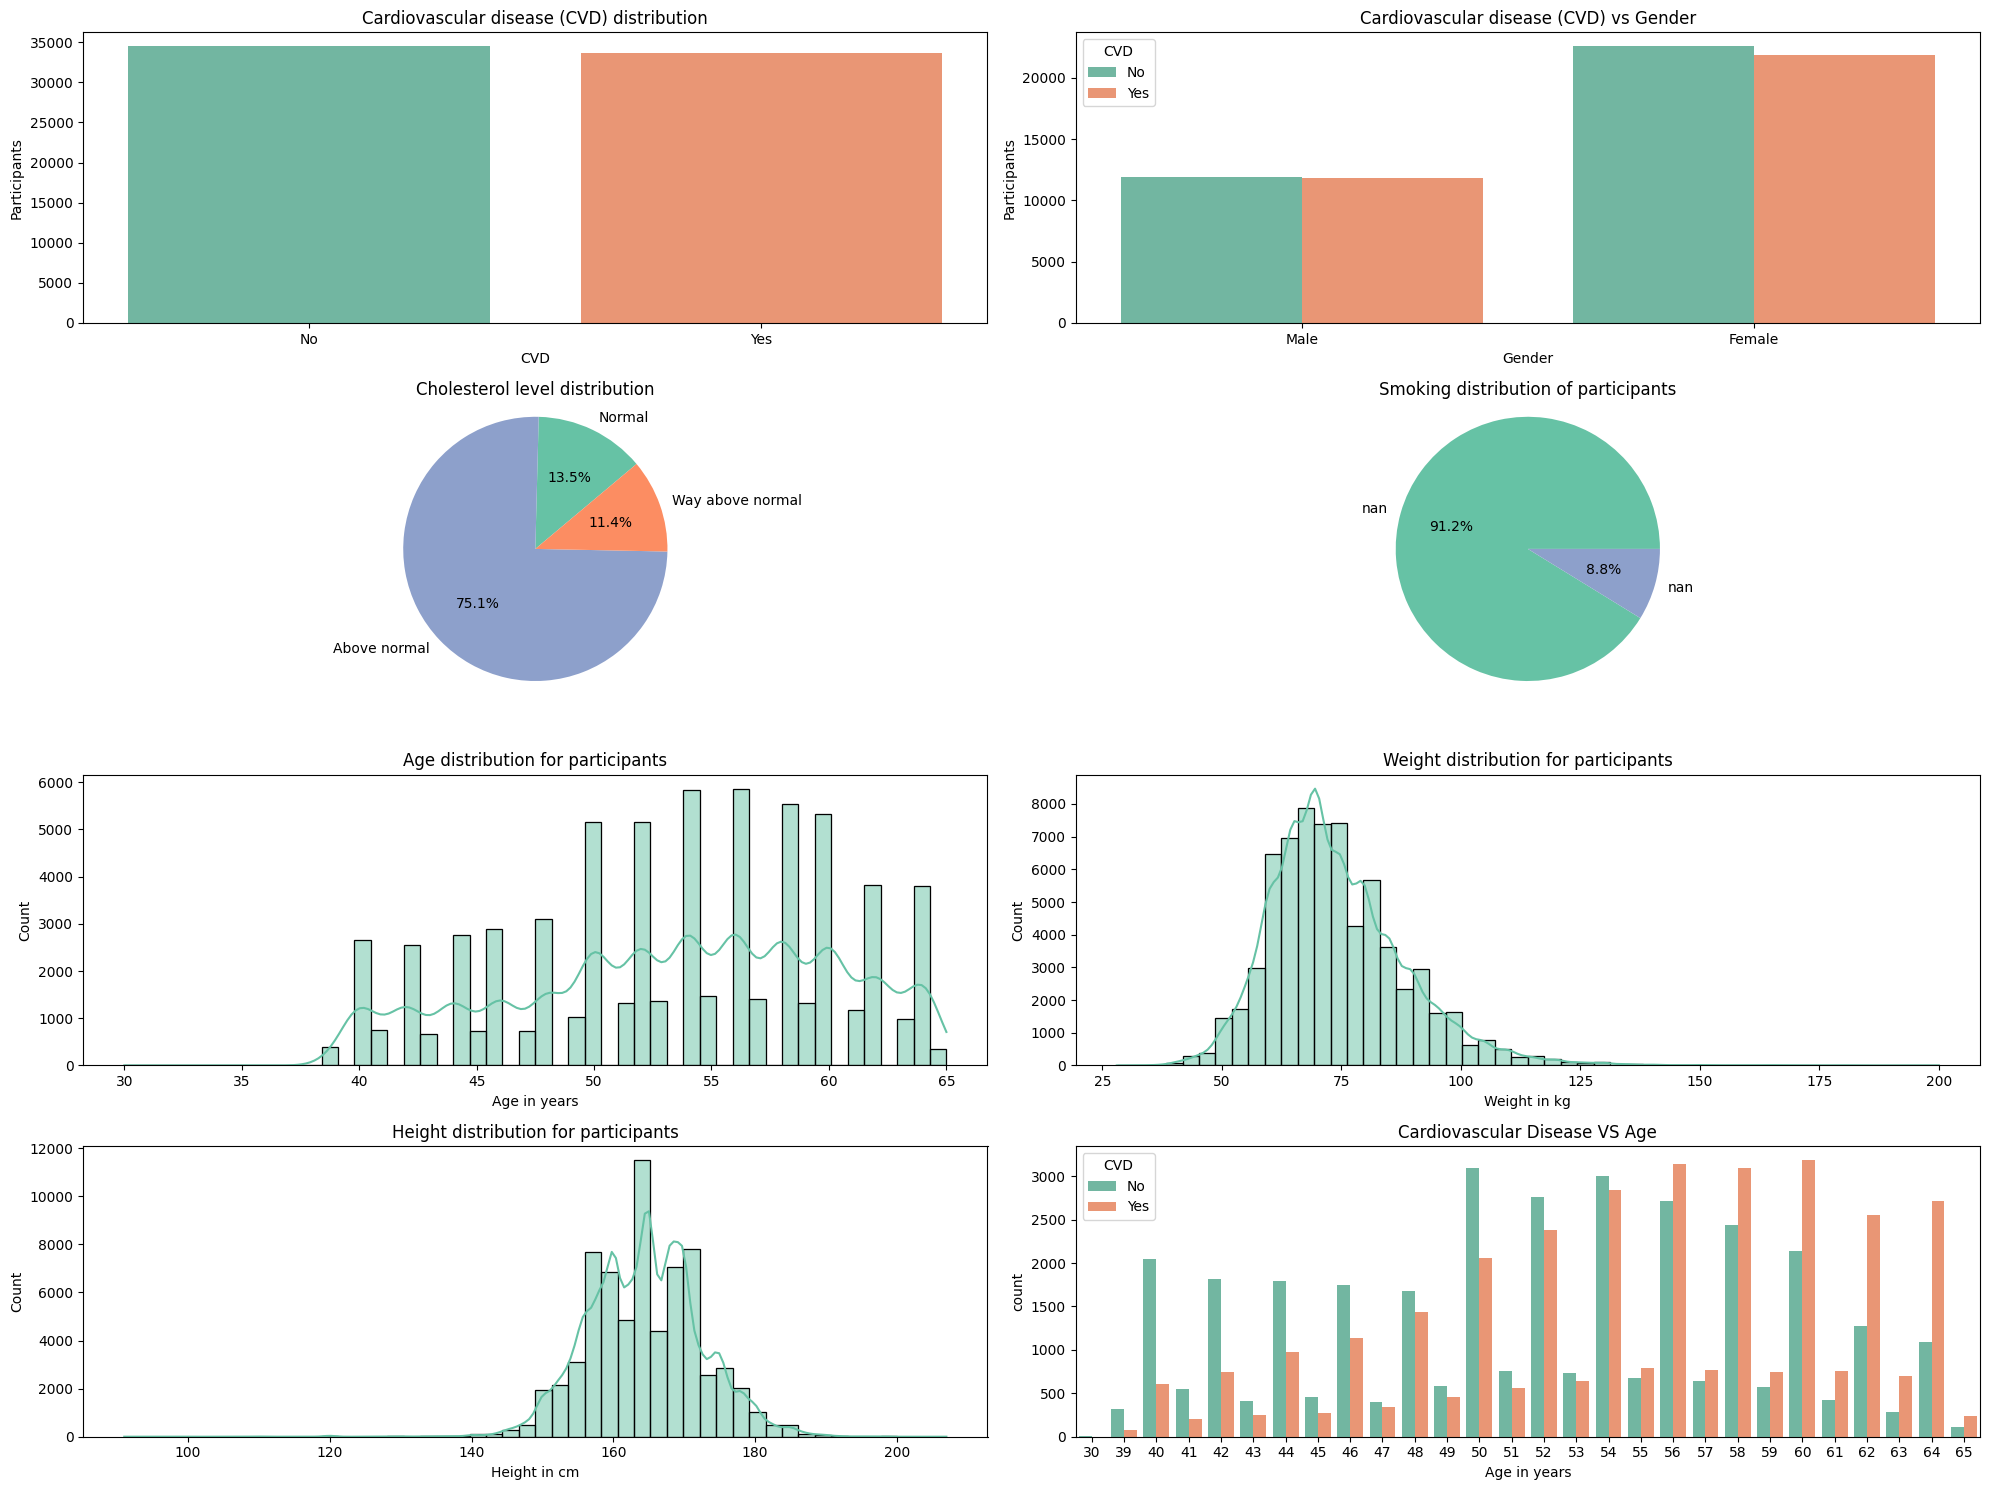

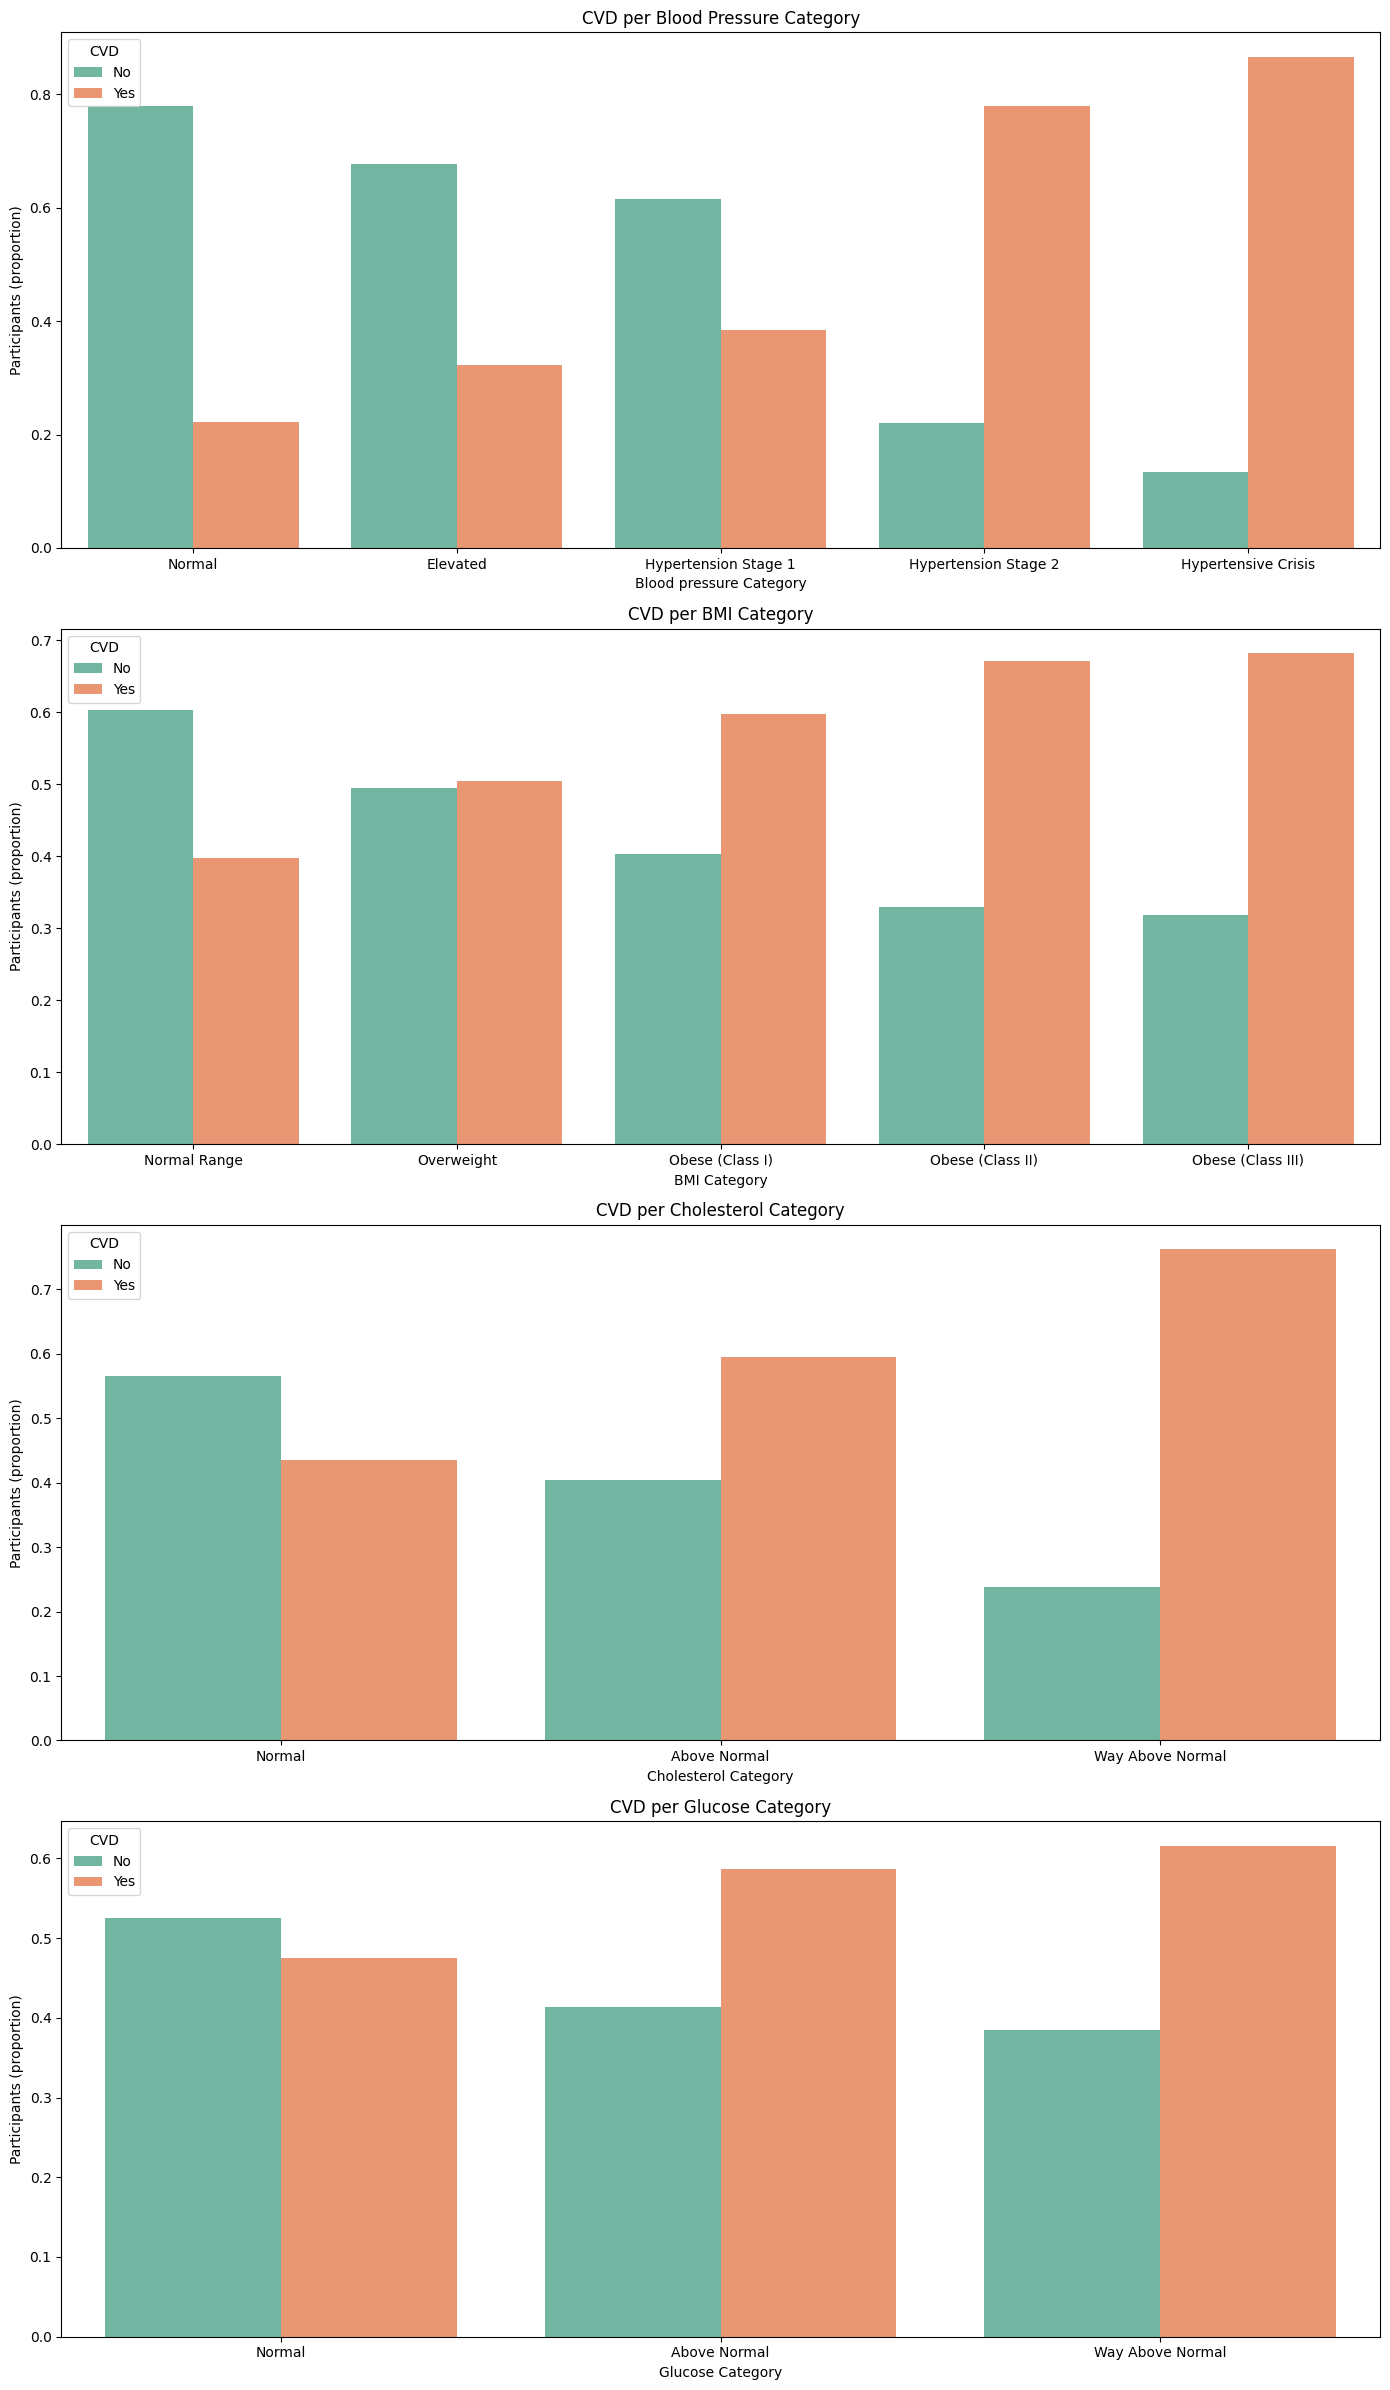

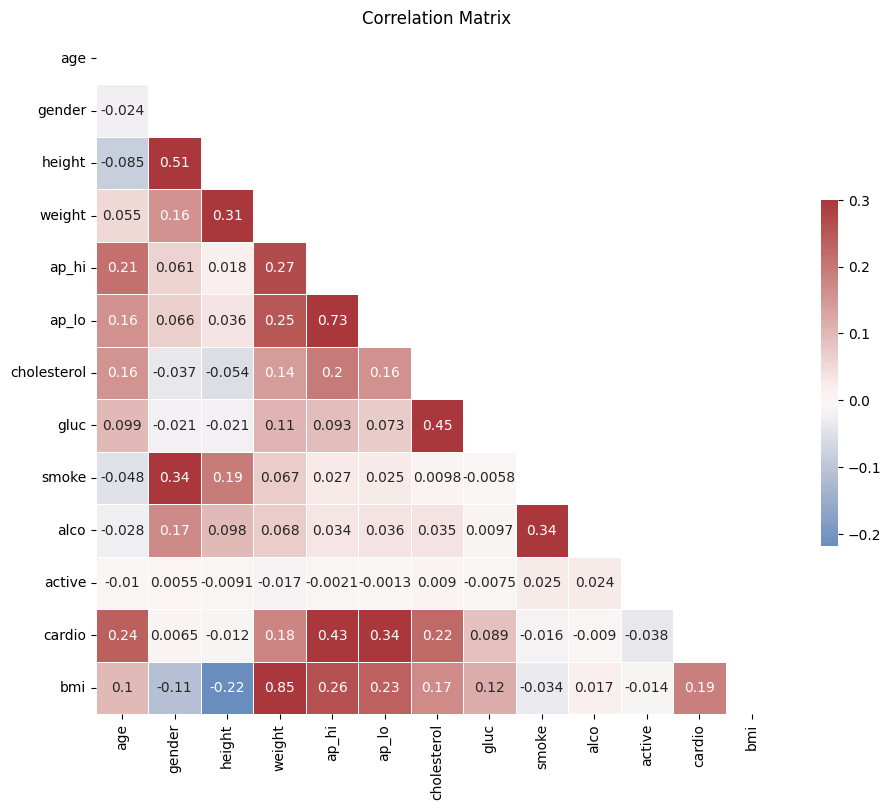

In [157]:
# Skapa ett DataVisualizer-objekt med den bearbetade datan
visualizer = DataVisualizer(df_clean)

# Visa EDA över datan med olika visualiseringar i en subplot
visualizer.eda_overview()

# Visa översikten över sjukdomar med stapeldiagram i en subplot
visualizer.disease_overwiev()

# Visa korrelationsmatrisen över olika features
visualizer.correlation_heatmap()

## Datanalys EDA ##

Datan var överlag välbalanserad när det gäller fördelningen mellan friska och sjuka i hjärt- och kärlsjukdom (cardio), likaså mellan könen inom respektive kategori. Även om det fanns fler kvinnliga deltagare än manliga, bedömdes detta inte påverka analysens giltighet. Detta eftersom fördelningen mellan sjuka respektive friska var jämn inom varje kön.

Ett tydligt samband kunde ses mellan stigande ålder bland patienterna och förekomst av hjärt-kärlsjukdom. Speciellt bland de som var över 50 och äldre, vilket var förväntat då hjärtrelaterade sjukdomar ofta ökar med åldern. Källa: https://www-nia-nih-gov.translate.goog/health/heart-health?_x_tr_sl=en&_x_tr_tl=sv&_x_tr_hl=sv&_x_tr_pto=rq. Dock var ålder i sig inte en tillräckligt pålitlig prediktor då fler faktorer ofatst spelar in för om någon riskerar att drabbas av sjukdom. Övriga sjukdomsrelaterade variabler som BMI, kolesterolnivåer och blodsockervärden visade överlag svaga till måttliga samband med hjärt-kärlsjukdom. Trots att många sjuka patienter hade förhöjda värden i andra sjukomskategorier kan den svaga korrelationen förklaras av att endast en liten andel deltagare tillhörde de högsta riskkategorierna i dessa variabler.

De mest framträdande sambanden återfanns mellan hjärt-kärlsjukdom och högt systoliskt/diastoliskt blodtryck, ålder, kolesterol, BMI och vikt. Där högt systoliskt blodtryck hade starkast korrelation till hjärt-kärlsjukdom med 0.43. 

In [158]:
# Skapa ett DataPreparer-objekt med den bearbetade datan
preparer = DataPreparer(df_clean)

# Skapa dataset med one-hot encoding
df1, df2 = preparer.create_datasets()

# Dela upp dataset 1 & 2 i tränings-, validerings- och testset  
X_train1, X_val1, X_test1, y_train1, y_val1, y_test1 = preparer.train_val_test_split(df1, target_col="cardio")
X_train2, X_val2, X_test2, y_train2, y_val2, y_test2 = preparer.train_val_test_split(df2, target_col="cardio")

# Visa storlekarna på de båda datasetten för att verifiera uppdelningen 
#print(f"Dataset 1 - X_train: {X_train1.shape}, y_train: {y_train1.shape}, X_val: {X_val1.shape}, y_val: {y_val1.shape}, X_test: {X_test1.shape}, y_test: {y_test1.shape}\n"
    #f"Dataset 2 - X_train: {X_train2.shape}, y_train: {y_train2.shape}, X_val: {X_val2.shape}, y_val: {y_val2.shape}, X_test: {X_test2.shape}, y_test: {y_test2.shape}")


In [ ]:
# Skapa en instans för träning av Logistic Regression-modellen
trainer = ModelTrainer() 

# Definiera modellens hyperparametarar
param_grid_lr = {
    "lr__C": [0.01, 0.1, 1, 10],
    "lr__penalty": ["l1", "l2"],
    "lr__solver": ["liblinear", "saga"]
}

# Träna, parametertuna och korsvalidera modellen på båda datasetten och spara den bästa modellen
# Dataset 1:
best_model1 = trainer.train_logistic_regression(X_train1, y_train1, param_grid_lr)
trainer.save_model(best_model1, "logistic_regression_dataset1.pkl")
# Dataset 2:
best_model2 = trainer.train_logistic_regression(X_train2, y_train2, param_grid_lr)
trainer.save_model(best_model2, "logistic_regression_dataset2.pkl")

# Validera modellen på dataset 1 och 2
trainer.evaluate_model(best_model1, X_val1, y_val1)
trainer.evaluate_model(best_model2, X_val2, y_val2)

In [31]:
# Skapa en instans för träning av Decision Tree-modellen
trainer_decision_tree = ModelTrainer()

# Definiera modellens hyperparametarar
param_grid_dt = {
    "dt__max_depth": [5, 10, 15],
    "dt__min_samples_split": [2, 5, 10],
    "dt__min_samples_leaf": [1, 2, 4]
}
# Träna, parametertuna och korsvalidera modellen på dataset 1 och 2 och spara den bästa modellen
# Dataset 1:
best_model1 = trainer.train_decision_tree(X_train1, y_train1, param_grid_dt)
trainer.save_model(best_model1, "decision_tree_dataset1.pkl")
# Dataset 2:
best_model2 = trainer.train_decision_tree(X_train2, y_train2, param_grid_dt)
trainer.save_model(best_model2, "decision_tree_dataset2.pkl")

# Validera modellen på dataset 1 och 2
trainer.evaluate_model(best_model1, X_val1, y_val1)
trainer.evaluate_model(best_model2, X_val2, y_val2)

Decision Tree - Best Params: {'dt__max_depth': 5, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}
Decision Tree - CV Score: 0.7199102982870658
Modellen sparad som: decision_tree_dataset1.pkl
Decision Tree - Best Params: {'dt__max_depth': 5, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 2}
Decision Tree - CV Score: 0.7301986004442714
Modellen sparad som: decision_tree_dataset2.pkl
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      7184
           1       0.74      0.68      0.71      7133

    accuracy                           0.72     14317
   macro avg       0.72      0.72      0.72     14317
weighted avg       0.72      0.72      0.72     14317

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.81      0.75      7184
           1       0.77      0.64      0.70      7133

    accuracy                           0.73     14317
   macro av

array([1, 1, 0, ..., 1, 0, 0], shape=(14317,))

### Modell ###

För att förutspå om en patient har hjärt-kärlsjukdom (målvariabeln "cardio") utvärderades fyra olika maskininlärningsmodeller. Dessa tränades efter hyperparameteroptimering med hjälp av GridSearchCV, och kombinerades även i en ensemblemodell via en Voting Classifier för ytterligare utvärdering.

Modellerna testades på två separata dataset som skapades genom att förändra strukturen i datamängden:
	
•	**Dataset 1:** Här togs kolumnerna ap_hi, ap_lo, height, weight och BMI bort. Därefter tillämpades *one-hot encoding* på de kategoriska variablerna BMI-kategori, blodtryckskategori och kön.
	
•	**Dataset 2:** I detta fall togs BMI-kategori, blodtryckskategori, height och weight bort, och *one-hot encoding* tillämpades endast på kön.

Syftet med att skapa två versioner av datasetet var att undersöka hur olika featurekombinationer påverkar modellernas prestanda vid klassificering av hjärt-kärlsjukdom.

#### Modellerna som testades var: ####
- **Logistisk Regression:** En statistisk modell för binär klassificering som estimerar sannolikheten att en observation tillhör en viss klass. Där sigmoid funktion används för att beräkna sannolikheten att en oberoende variabel tillhör en viss klass. Sannolikheten $P(y=1 \mid X)$ ges av: $P(y=1 mid X) = frac{1}{1 + e^{-(beta\_0 + beta\_1 x\_1 + dots + beta\_p x\_p)}}$

	Hyperparametrar som testades för denna modell var **C:** (0.01, 0.1, 1, 10); regulariseringsgrad för balans mellan bias och varians. **Penalty**: (l1, l2): strafftermer för att ta bort eller begränsa variablers påverkan för överanpassning. **Solver**: (liblinear", "saga); för att optimera algoritmen beroende på vilken straffterm som används.

- **Decision Tree:** (*belsutsträd på svenska*) var den modell som slutligen valdes för att klassificera hjärt- kärlsjuka. Det är en modell som delar upp datan i ett hierarkiskt träd med sekventiella ja- och nej-frågor för att kunna klassificera.  

	Beslutträdet är strukturerat med en **Root Node** längst upp som är startpunkten som representerar hela datan. Denna följs av **Branches** (*grenar*) vilken kopplar samman trädstrukturen och visar dess flöde. Dessa grenar når olika **Internal Nodes** som är **Splits** (*beslutspunkter*) där trädets grenar skiljs åt av ett beslut i ja/nej-frågor. Dessa splits leder grenarna nedåt i strukturen till **Leaf Nodes** (*bladnod*) som är de slutgiltiga punkterna som representerar ett beslut för en klassificering.   
  
	Varje split väljs för att maximera separationen mellan klasser, ofta genom att minimera mått som *Gini-index eller entropi*. Där Gini-index mäter graden av oordning i en nod och definieras som:
	**Gini** = 1 - sum p\_i^2 där p\_i och är andelen observationer för klass *i*. Medan Entropi mäter informationsinnehållet och definieras som: **Entropy** = -sum p\_i log\_2(p\_i)
  
	Fördelarna med beslutsträd är att de är enkla att tolka, kräver ingen dataskalning och kan hantera både numeriska och kategorisk data vilket lämpade sig väl för denna laboration. Dock kan beslutsträd lät överanpassa (*overfitting*) modellen om trädet får växa fritt.   
  
	För att begränsa modellen att växa fritt testades en rad hyperparametrar:  **max\_depth:** (5, 10, 15); begränsar hur djup trädet (komplext) får bli vilket undviker och överanpassning. **min\_samples\_split** (2, 5, 10), vilket begränsar antalet datapunkter som krävs för att en split kan ske för att fånga små mönster i datan. Samt **min\_samples\_leaf** (1, 2, 4); minsta antal observationer i en bladnod för att ingen viktig information från datan förloras. 

- **Random Forest Classifier:** En ensemblemetod som bygger många beslutsträd på slumpmässiga subset av datan och använder majority voting (*majoritetsröstning*) för att bestämma slutgiltig klassificering. Där varje träd tränas på en unik uppsättning slumpmässig data (*bagging*) och även slumpmässiga variabler vid skapande av varje träd. Detta ger en robust model som fungerar på stora dataset samt kan hantera flera olika features samtidigt. Hyperparametrar som testades var: **n\_estimators:** (*100, 200, 300*); antal beslutsträd i strukturen.**max\_depth:** (*5, 10, 15*); maxgröns för hur djupt trädet får gå. **min\_samples\_split:** (*2, 5, 10*); minsta antal observationer för en split.  **min\_samples\_leaf**: (*1, 2, 4*); storlek på löven för bruskontroll. 

- **Support Vector Machine (SVM):** (*stödvektormaskin*) är en modell som söker det optimala hyperplanet där klasserna separeras med störst marginal. Marginalen är avståndet mellan hyperplanet och de närmaste punkterna (stödvektorerna) i datan. Hyperparametrar som testades för denna modell var **C**: (*0.1, 1, 10*); där ett högre *C* straffar felklassificering av riskfaktorer hårdare. **Kernel:** (*linear, rbf*); vilka fångar linjära och ickelinjära samband. 

- **Voting Classifier:** En ensemblemetod som kombinerade de bästa parametrarna från varje basmodell för att göra en gemensam klassificering av målvariabeln. Detta görs genom omröstning av (*hard- eller soft-voting*). I hard voting röstar varje modell på en klass, och majoritetsklassen väljs som slutgiltigt utfall. I soft voting beräknas medelvärdet av sannolikheterna från varje modell, och klassen med högst genomsnittlig sannolikhet väljs. I denna undersökning användes hard voting, eftersom SVM-modellen som testades inte stödjer sannolikhetsbaserade utfall utan betydande prestandapåverkan.

In [ ]:
# Skapa en instans för träning av Random Forest-modellen
trainer = ModelTrainer()

# Definiera modellens hyperparametarar
param_grid_rf = {
    "rf__n_estimators": [100, 200, 300],
    "rf__max_depth": [5, 10, 15],
    "rf__min_samples_split": [2, 5, 10],
    "rf__min_samples_leaf": [1, 2, 4]
}

# Träna, parametertuna och korsvalidera modellen på dataset 1 och 2 och spara den bästa modellen
# Dataset 1:
best_model1 = trainer.train_random_forest(X_train1, y_train1, param_grid_rf)
trainer.save_model(best_model1, "random_forest_dataset1.pkl")
# Dataset 2:
best_model2 = trainer.train_random_forest(X_train2, y_train2, param_grid_rf)
trainer.save_model(best_model2, "random_forest_dataset2.pkl")

# Validera modellen på dataset 1 och 2
trainer.evaluate_model(best_model1, X_val1, y_val1)
trainer.evaluate_model(best_model2, X_val2, y_val2)

In [ ]:
# Skapa en instans för träning av SVM-modellen
trainer = ModelTrainer()

# Definiera modellens hyperparametarar
param_grid_svm = {
    "svm__C": [0.1, 1, 10],
    "svm__kernel": ["linear", "rbf"],
    "svm__gamma": ["scale", "auto"]
}
# Träna, parametertuna och korsvalidera modellen på dataset 1 och 2
# Dataset 1:
best_model1 = trainer.train_svm(X_train1, y_train1, param_grid_svm)
trainer.save_model(best_model1, "svm_dataset1.pkl")
# Dataset 2:
best_model2 = trainer.train_svm(X_train2, y_train2, param_grid_svm)
trainer.save_model(best_model2, "svm_dataset2.pkl")
# Validera modellen på dataset 1 och 2
trainer.evaluate_model(best_model1, X_val1, y_val1)
trainer.evaluate_model(best_model2, X_val2, y_val2)


In [ ]:
#Skapa en instans för ensemble-modellering
ensemble = EnsembleModeler()

# skape en voting classifier för dataset 1 och spara den
voting_classifier_hard1 = ensemble.create_voting_classifier(dataset=1, vote_type='hard', X_train=X_train1, y_train=y_train1)
ensemble.save_model(voting_classifier_hard1, "voting_classifier_hard_dataset1.pkl")
# Validera modellen på dataset 1
ensemble.evaluate_voting_classifier(X_val1, y_val1)
# skape en voting classifier för dataset 2 och spara den
voting_classifier_hard2 = ensemble.create_voting_classifier(dataset=2, vote_type='hard', X_train=X_train2, y_train=y_train2)
ensemble.save_model(voting_classifier_hard2, "voting_classifier_hard_dataset2.pkl")
# Validera modellen på dataset 2
ensemble.evaluate_voting_classifier(X_val2, y_val2)

In [145]:
# Ladda in de sparade resultaten modellerna för båda datasetten
# Dataset 1
lr_ds1 = ModelTrainer.load_model("logistic_regression_dataset1.pkl")
dt_ds1 = ModelTrainer.load_model("decision_tree_dataset1.pkl")
rf_ds1 = ModelTrainer.load_model("random_forest_dataset1.pkl")
svm_ds1 = ModelTrainer.load_model("svm_dataset1.pkl")
voting_ds1 = EnsembleModeler.load_model("voting_classifier_hard_dataset1.pkl")
# Dataset 2
lr_ds2 = ModelTrainer.load_model("logistic_regression_dataset2.pkl")
dt_ds2 = ModelTrainer.load_model("decision_tree_dataset2.pkl")
rf_ds2 = ModelTrainer.load_model("random_forest_dataset2.pkl")
svm_ds2 = ModelTrainer.load_model("svm_dataset2.pkl")
voting_ds2 = EnsembleModeler.load_model("voting_classifier_hard_dataset2.pkl")

# Skapa dictionaries för att lagra modellerna för båda datasetten
# Dataset 1
models_ds1 = {
    "Logistic Regression": lr_ds1,
    "Decision Tree": dt_ds1,
    "Random Forest": rf_ds1,
    "SVM": svm_ds1,
    "Voting Classifier": voting_ds1
}
# Dataset 2
models_ds2 = {
    "Logistic Regression": lr_ds2,
    "Decision Tree": dt_ds2,
    "Random Forest": rf_ds2,
    "SVM": svm_ds2,
    "Voting Classifier": voting_ds2
}

# Slå samman båda dictionaries
all_models = {**models_ds1, **models_ds2}

# Skapa listor med X_val och y_val för båda datasetten
X_val_list = [X_val1, X_val2]
y_val_list = [y_val1, y_val2]
dataset_names = ["Dataset 1", "Dataset 2"]

Modellen laddad från: logistic_regression_dataset1.pkl
Modellen laddad från: decision_tree_dataset1.pkl
Modellen laddad från: random_forest_dataset1.pkl
Modellen laddad från: svm_dataset1.pkl
Modellen laddad från: voting_classifier_hard_dataset1.pkl
Modellen laddad från: logistic_regression_dataset2.pkl
Modellen laddad från: decision_tree_dataset2.pkl
Modellen laddad från: random_forest_dataset2.pkl
Modellen laddad från: svm_dataset2.pkl
Modellen laddad från: voting_classifier_hard_dataset2.pkl


### Val av Modell ###

Efter utvärdering av respektive modells bästa parmetrar och deras resultat på båda datasetten, så valdes Decision Tree-modellen (*belsutsträd*) på dataset 1. Då den presterade bäst på den postiva klassen (*1*) med ett *Recall*-värde på 0.68. Den hade även den bästa *F1*-poängen (0.71) men däremot lägst *Precision*-poäng (0.74). Vilket innebär att modellen var bäst efter träning på att faktiskt hitta patienter med hjärt-kärlsjukdom (positiva fall) och bäst på balans mellan både faktsika och predikta sjuka (f1-score). Trots sin lägre precisionspoäng så vägde recall tyngre i belsutet eftersom man i största möjliga mån undvika *False Negatives*, dvs att missa någon som faktisk är sjuk.

In [ ]:
# Skapa en instans av ModelTrainer för att utvärdera modellerna 
trainer = ModelTrainer()

# Visa en tabell med utvärderingsresultat för samtliga modeller och sortera efter Recall #Kodhjälp ChatGPT, prompt: "hur kan jag visa en tabell med resultaten för recall, precision för f1 score för samtliga modeller på båda mina dataset och sortera efter Recall i Python?"
# För dataset 1
trainer.show_evaluation_table(
    models=models_ds1,  # ex: {"RF": model1, "DT": model2}
    X_val_list=[X_val1],
    y_val_list=[y_val1],
    dataset_names=["Dataset 1"],
    sort_by="Recall",
    highlight=False
)

# För dataset 2
trainer.show_evaluation_table(
    models=models_ds2,  # ex: {"RF": model1, "DT": model2}
    X_val_list=[X_val2],
    y_val_list=[y_val2],
    dataset_names=["Dataset 2"],
    sort_by="Recall",
    highlight=False
)

,Dataset,Model,Precision,Recall,F1 Score
1,Dataset 1,Decision Tree,0.74,0.68,0.71
0,Dataset 1,Logistic Regression,0.76,0.64,0.69
2,Dataset 1,Random Forest,0.76,0.64,0.70
3,Dataset 1,SVM,0.76,0.64,0.69
4,Dataset 1,Voting Classifier,0.77,0.61,0.68


,Dataset,Model,Precision,Recall,F1 Score
0,Dataset 2,Logistic Regression,0.76,0.66,0.70
2,Dataset 2,Random Forest,0.76,0.66,0.71
3,Dataset 2,SVM,0.76,0.66,0.71
1,Dataset 2,Decision Tree,0.77,0.64,0.70
4,Dataset 2,Voting Classifier,0.78,0.63,0.70


Modellen laddad från: decision_tree_dataset1.pkl
Final Evaluation on Test Data
              precision    recall  f1-score   support

           0       0.70      0.77      0.74      3066
           1       0.75      0.67      0.71      3071

    accuracy                           0.72      6137
   macro avg       0.72      0.72      0.72      6137
weighted avg       0.72      0.72      0.72      6137



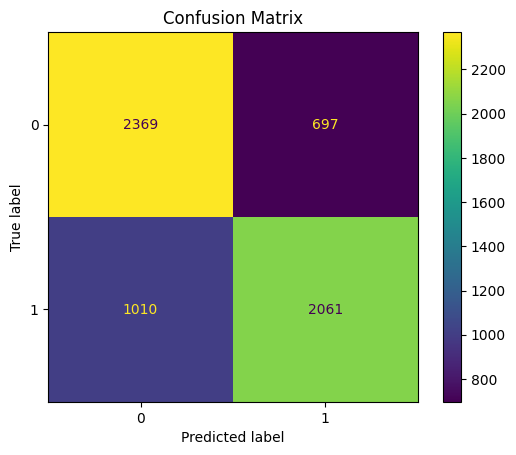

In [ ]:
# Skapa en instans av ModelTrainer för att utvärdera vald modell 
trainer = ModelTrainer()

# Ladda in den bästa modellen för dataset 1
best_model1 = ModelTrainer.load_model("decision_tree_dataset1.pkl")

# Träna på all träningsdata och kör en slutlig utvärdering på testdata
trainer.final_evaluation_on_test(
    model=best_model1,
    X_train=X_train1,
    y_train=y_train1,
    X_val=X_val1,
    y_val=y_val1,
    X_test=X_test1,
    y_test=y_test1
)

### Resultat ###

Eftersom Decision Tree uppvisade bäst balans mellan precision, recall och F1-score, särskilt för den positiva klassen (personer med hjärt-kärlsjukdom). Så tränades den mot all träningsdata i dataset 1 (tränings- och validetingsdata) innna den utvärderades mot testdatan. Vid utvärderingen presterade modellen snarlikt det den gjort vid utvärderingen av valderingsdatan:

- Precision (jkass 1): 0.75
- Recall (klass 1): 0.67
- F1-score (klass 1): 0.71
- Accuracy: 72 %

Modellens Recall (0.67), vilken representerar modellens förmåga att identifiera individer som faktiskt är sjuka. Eftersom hjärt-kärlsjukdom är ett allvarligt sjukdomstillstånd är det viktigare att modellen fångar upp så många verkliga fall som möjligt (minimerar false negativa), även om det sker på bekostnad av en något högre andel falskt positiva.

Modellen har också god precision (0.75), vilket innebär att majoriteten av de personer som klassificeras som sjuka verkligen är det. Detta visar att modellen inte bara är känslig, utan också förhållandevis specifik, vilket är önskvärt vid medicinsk screening. Kombinationen av dessa faktorer gör modellen lämplig för praktiska tillämpningar där risken för att missa ett sjukdomsfall måste hållas låg.

### Diskussion ###

En viktig begränsning för både den valda modellen (beslutsträd) och de övriga modellerna som testades, var att de ur ett medicinskt perspektiv presterade dåligt på *Recall* för den postiva klassen men även på *Precision*. Där ett optimalt resultat hade varit att uppnå över 80 % i både recall och precision för att modellen skulle kunna var användbar ett kliniskt sammanhang (källa:https://pmc.ncbi.nlm.nih.gov/articles/PMC8993826/) I slututvärderingen identifierade modellen cirka 67 % av de patienter som faktiskt var sjuka, vilket innebär att över 30 % sjuka missas. Detta är särskilt problematiskt i screeningprocesser som rör allvarliga sjukdomar som hjärt-kärlsjukdom, där det är avgörande att identfiera riskfall korrekt och i tid. En hög recall är ofta viktigare än precision i dessa fall, vilket nämnts tdidigare, då konsekvensen av att missa en sjuk individ (*False Negative*) kan vara förödande för den drabbade. Samtidigt innebär en mycket hög recall ofta att fler friska individer felaktigt klassificeras som sjuka (falskt positiva). I allvarliga sjukdomstillstånd kan detta medföra onödig påfrestnig och kostnader för vården, men framförallt oönskad och hälsovådlig psykisk stress för feldiagnostiserade. Därför vägde recall tyngre i utvärderingen trots att andra modeller visade bra balans och högre precision, om än lägre recall.

Andra begränsningar var att det finns viss obalans i datan, även om fördelningen mellan friska och sjuka totalt sett var relativt jämn. Det visade sig att vissa riskgrupper som patienter med mycket högt blodtryck eller högre BMI-värden var underrepresenterade i datasetten. Detta kan ha påverkat modellens förmåga att generalisera dessa vilket i sin tur kan ha dragit ned recall-poängen. Modellen blir således något viktad och det visas på att den presterade bättre på att faktisk hitta friska personer (Recall: 0.77). 

Ytterligare en begränsning var att endast strukturerade, kvantitativa variabler inkluderades i modellen. Faktorer som arv, livsstil, stress, och kostvanor, som ofta är starkt kopplade till hjärt-kärlsjukdomar saknades. Att inkludera sådana variabler i framtida studier hade sannolikt förbättrat modellens resultat ytterligare. 

Fler förbättringar för att höja recall-värdet innefattar att utöka träningsdatan, vilket kan förbättra modellens generaliseringsförmåga. Dock finns en risk med överanpassning om datan inte är representativ. Att vissa features som exempelvis rökning ("smoke") och alkoholkonsumtion ("alco") visade svaga samband med målvariabeln och kan därför vara svårare för modellen att lära sig från även de kan vara bidragande faktorer för hjärt-kärlsjukdom. För att förbättra modellens förmåga att uppmärksamma minoritetsklasser och svagt representerade mönster kan tekniker som **SMOTE** (*Synthetic Minority Oversampling Technique*) användas. SMOTE syntetiserar nya datapunkter i minoritetsklassen för att balansera datan och minska risken att modellen förbiser viktiga, men underrepresenterade, riskfaktorer. Slutligen kan även alternativa ensemblemodeller som **Gradient Boosting** eller **XGBoost** övervägas, då dessa är mer kraftfulla och kan fånga komplexa icke-linjära samband i datan.


